# we will do dim reduction

In [41]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("../data/Trained_cleaned_heart_data.csv")
test=pd.read_csv("../data/Test_cleaned_heart_data.csv")
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
Xtest=test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,target
0,0.534884,0.0,0.473684,0.472424,0.0,0.811321,0.0,0.000000,1.0,1,0,0,0,1,1,0,0,0,1
1,0.116279,1.0,0.605263,0.788966,0.0,0.886792,0.0,0.000000,0.0,0,1,0,0,1,0,0,0,0,0
2,0.209302,1.0,0.473684,0.769539,0.0,0.698113,0.0,0.553581,1.0,0,1,0,0,0,0,0,0,0,0
3,0.651163,1.0,0.447368,0.342576,1.0,0.490566,0.0,0.000000,0.0,1,0,0,0,1,0,0,0,0,0
4,0.255814,1.0,0.447368,0.746404,0.0,0.773585,0.0,0.000000,0.0,1,0,0,0,1,0,0,0,0,0


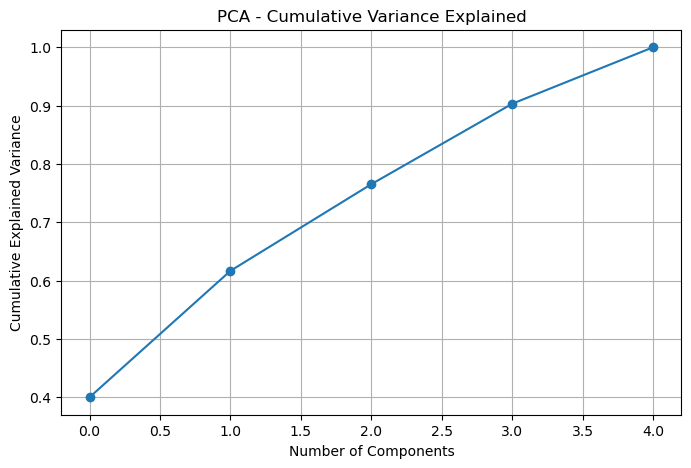

In [42]:
pca = PCA()
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [43]:
## we wil choose 3 components

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)
Xtest_pca = pca.transform(Xtest)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_test=pd.DataFrame(Xtest_pca, columns=['PC1', 'PC2', 'PC3'])

pca_df.head()

,PC1,PC2,PC3
0,-0.307550,-0.181918,0.003647
1,-0.492381,-0.169462,-0.235974
2,-0.000998,0.140311,-0.199347
3,-0.105579,-0.163642,0.226447
4,-0.416499,-0.138808,-0.023893


In [44]:
to_drop = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[['PC1', 'PC2', 'PC3']] = pca_df[['PC1', 'PC2', 'PC3']].values
test[['PC1', 'PC2', 'PC3']] = pca_test[['PC1', 'PC2', 'PC3']].values
## just to check the dropped columns are there 
df = df.drop(columns=[col for col in to_drop if col in df.columns])
test = test.drop(columns=[col for col in to_drop if col in test.columns])
df.head()
df.to_csv("../data/Trained_pca_heart.csv", index=False)
test.to_csv("../data/Test_pca_heart.csv", index=False)
df.head()

,sex,fbs,exang,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,target,PC1,PC2,PC3
0,0.0,0.0,0.0,1.0,1,0,0,0,1,1,0,0,0,1,-0.307550,-0.181918,0.003647
1,1.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,-0.492381,-0.169462,-0.235974
2,1.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,-0.000998,0.140311,-0.199347
3,1.0,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,-0.105579,-0.163642,0.226447
4,1.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,-0.416499,-0.138808,-0.023893
